In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import h5py
from scipy.io import loadmat, savemat
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
%matplotlib inline

/home/joeldapello/anaconda3/envs/torch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
file = h5py.File('../featureData/fc7OccTrajs.mat')
traj_ref = file['occ_trajs']
fc7_full_polarized = loadmat('../featureData/fc7FullAndOccPol_325.mat')['fc7_full_polarized']
classes = np.squeeze(loadmat('../featureData/fc7FullAndOccPol_325.mat')['classes'])
labels = [i for i in range(fc7_full_polarized.shape[0])]

# svm on classes

In [3]:
# train svm on fc7 whole image representations
lin_clf = svm.LinearSVC()
lin_clf.fit(fc7_full_polarized, classes)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
obj_num = traj_ref.shape[1]
print('obj_num: ', obj_num)

check_at = [0,10,50]

y = []
y_hat = {i:[] for i in check_at}

for i in range(obj_num):
    for j in check_at:
        fc7_j = file[traj_ref[0,i]][:,j,::2].T
        dec = lin_clf.decision_function(fc7_j)
        y_hat[j] += [hot.argmax() for hot in dec]

    # construct class labels
    y += [classes[i]-1 for _ in range(len(fc7_j))]

t0_score = sum([y_hat[0][i]==y[i] for i in range(len(y))])/len(y_hat[0])
t10_score = sum([y_hat[10][i]==y[i] for i in range(len(y))])/len(y_hat[10])
t50_score = sum([y_hat[50][i]==y[i] for i in range(len(y))])/len(y_hat[50])
print('\n',t0_score,'\n',t10_score,'\n',t50_score)

obj_num:  325

 0.28615384615384615 
 0.28615384615384615 
 0.29523076923076924


# SVM on all 325 object ids

In [11]:
# train svm on fc7 whole image representations
lin_clf = svm.LinearSVC()
lin_clf.fit(fc7_full_polarized, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
check_at = [0,10,50]

y = []
y_hat = {i:[] for i in check_at}

for i in range(obj_num):
    for j in check_at:
        fc7_j = file[traj_ref[0,i]][:,j,::2].T
        dec = lin_clf.decision_function(fc7_j)
        y_hat[j] += [hot.argmax() for hot in dec]

    # construct class labels
    y += [i for _ in range(len(fc7_j))]

t0_score = sum([y_hat[0][i]==y[i] for i in range(len(y))])/len(y_hat[0])
t10_score = sum([y_hat[10][i]==y[i] for i in range(len(y))])/len(y_hat[10])
t50_score = sum([y_hat[50][i]==y[i] for i in range(len(y))])/len(y_hat[50])
print('\n',t0_score,'\n',t10_score,'\n',t50_score)


 0.015692307692307693 
 0.011076923076923076 
 0.010769230769230769


In [16]:
sum([i == 40 for i in y_hat[50]])/len(y_hat[50])

0.7633846153846154

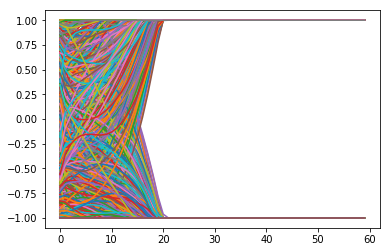

In [39]:
pd.DataFrame(fc7OccTrajs[0,0][0,:]).plot(legend=False)

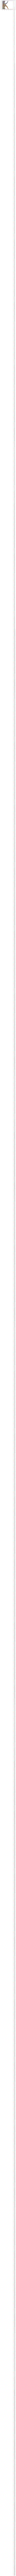

In [53]:
pd.DataFrame(fc7_test_occ_hop_trajs[10,:,:]).plot()

In [49]:
fc7_test_occ_hop_trajs[0,:,:]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])